In [2]:
# Importando as bibliotecas necessárias
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np
# local do arquivo
Caminho='C:/_Academico/PUC/202401/PROJETO INTEGRADO NEGÓCIOS/Iris.xlsx'

In [3]:
#Traz o arquivo para o Python
df=pd.read_excel(Caminho)
df.head()

,sepal length,sepal width,petal length,petal width,iris,tipo_iris
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1


In [4]:
# Separando as variáveis independentes (features) e a variável dependente (resposta)
X = df[['sepal length', 'sepal width', 'petal length', 'petal width']]  # features
y = df['tipo_iris']  # target

# Criando o modelo de análise discriminante linear
lda = LinearDiscriminantAnalysis()

# Ajustando o modelo aos dados
lda.fit(X, y)

# Calculando a estatística de Wilks' Lambda
wilks_lambda = lda.decision_function(X)

# Calculando a matriz de classificação
y_pred = lda.predict(X)
conf_matrix = confusion_matrix(y, y_pred)

# Obtendo os coeficientes de Fisher
fisher_coefficients = lda.scalings_

# Obtendo os autovalores
eigenvalues = lda.explained_variance_ratio_

# Obtendo as funções discriminantes
discriminant_functions = lda.coef_

# Obtendo os centroides de cada classe
centroids = lda.means_


# Exibindo as estatísticas calculadas
print("Matriz de Classificação:\n", conf_matrix)
print()
print("Autovalores:\n", eigenvalues)
print()

# Exibindo os centroides
print("Centroids")
for i, centroid in enumerate(centroids):
    print(f"Classe {i + 1}: {centroid}")
print()
## Exibindo os pesos das variáveis na função discriminante
print("Pesos das variáveis na função discriminante:")
for i, weight in enumerate(fisher_coefficients.T):
    print(f"Função {i + 1}:")
    for j, variable in enumerate(X.columns):
        print(f"  {variable}: {weight[j]}")
print()
    
print("Pesos das variáveis em cada função discriminante de Fisher :")
for i, discriminant_function in enumerate(discriminant_functions):
    print(f"Função Discriminante {i + 1}:")
    for j, variable in enumerate(X.columns):
        print(f"  {variable}: {discriminant_function[j]}")
print()


# Examinando os coeficientes de Fisher
fisher_coefficients = lda.scalings_

# Calculando os valores absolutos dos coeficientes de Fisher
abs_fisher_coefficients = np.abs(fisher_coefficients)

# Normalizando os coeficientes de Fisher (opcional)
normalized_fisher_coefficients = abs_fisher_coefficients / np.max(abs_fisher_coefficients)

# Criando um dicionário para mapear cada variável ao seu coeficiente de Fisher ou valor normalizado
variable_coefficients = dict(zip(X.columns, normalized_fisher_coefficients))

# Ordenando as variáveis pelo valor dos coeficientes
sorted_variable_coefficients = sorted(variable_coefficients.items(), key=lambda x: x[1][0], reverse=True)
# Exibindo as variáveis mais discriminantes
print("Variáveis mais discriminantes:")
for variable, coefficient in sorted_variable_coefficients:
    print(f"{variable}: {coefficient}")


Matriz de Classificação:
 [[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]

Autovalores:
 [0.99147248 0.00852752]

Centroids
Classe 1: [5.006 3.418 1.464 0.244]
Classe 2: [5.936 2.77  4.26  1.326]
Classe 3: [6.588 2.974 5.552 2.026]

Pesos das variáveis na função discriminante:
Função 1:
  sepal length: 0.8192685170786471
  sepal width: 1.5478732043328927
  petal length: -2.184940557484974
  petal width: -2.85385002221022
Função 2:
  sepal length: 0.03285975341230418
  sepal width: 2.1547110553096838
  petal length: -0.9302467922856403
  petal width: 2.8060046024170813

Pesos das variáveis em cada função discriminante de Fisher :
Função Discriminante 1:
  sepal length: 6.2462163656313505
  sepal width: 12.246107569772747
  petal length: -16.837434271154233
  petal width: -21.13723331031511
Função Discriminante 2:
  sepal length: -1.5166685741932608
  sepal width: -4.36791651586943
  petal length: 4.649825650407851
  petal width: 3.1864059405703955
Função Discriminante 3:
  sepal length: -4.7295477

In [5]:
#Comparando as médias para os grupos

from scipy.stats import f_oneway

# Separando os dados em cada grupo
group1 = df[df['tipo_iris'] == 1][['sepal length', 'sepal width', 'petal length', 'petal width']]
group2 = df[df['tipo_iris'] == 2][['sepal length', 'sepal width', 'petal length', 'petal width']]
group3 = df[df['tipo_iris'] == 3][['sepal length', 'sepal width', 'petal length', 'petal width']]

# Calculando as médias para cada grupo
means_group1 = group1.mean()
means_group2 = group2.mean()
means_group3 = group3.mean()

# Exibindo as médias para cada grupo
print("Médias para cada grupo:")
print("Grupo 1:", means_group1)
print("Grupo 2:", means_group2)
print("Grupo 3:", means_group3)
print()

# Realizando o teste ANOVA
anova_results = f_oneway(group1, group2, group3)

# Definindo os nomes das variáveis
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Exibindo o resultado da ANOVA com os nomes das variáveis
for i, variable in enumerate(variables):
    print(f"Variável: {variable}")
    print("Estatística F:", anova_results.statistic[i])
    print("Valor p:", anova_results.pvalue[i])
    print()

Médias para cada grupo:
Grupo 1: sepal length    5.006
sepal width     3.418
petal length    1.464
petal width     0.244
dtype: float64
Grupo 2: sepal length    5.936
sepal width     2.770
petal length    4.260
petal width     1.326
dtype: float64
Grupo 3: sepal length    6.588
sepal width     2.974
petal length    5.552
petal width     2.026
dtype: float64

Variável: sepal length
Estatística F: 119.26450218450468
Valor p: 1.6696691907693826e-31

Variável: sepal width
Estatística F: 47.36446140299382
Valor p: 1.3279165184572242e-16

Variável: petal length
Estatística F: 1179.0343277002194
Valor p: 3.0519758018278374e-91

Variável: petal width
Estatística F: 959.3244057257613
Valor p: 4.376956957488959e-85



In [6]:
#Fazendo os testes Post hoc

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Lista das variáveis
variables = ['sepal length', 'sepal width', 'petal length', 'petal width']

# Realizando o teste de Tukey para cada variável
for variable in variables:
    # Separando os dados em cada grupo para a variável atual
    group1 = df[df['tipo_iris'] == 1][variable]
    group2 = df[df['tipo_iris'] == 2][variable]
    group3 = df[df['tipo_iris'] == 3][variable]
    
    # Concatenando os dados de todos os grupos para a variável atual
    all_data = np.concatenate([group1.values, group2.values, group3.values])
    
    # Criando os rótulos dos grupos para a variável atual
    labels = ['grupo1'] * len(group1) + ['grupo2'] * len(group2) + ['grupo3'] * len(group3)
    
    # Realizando o teste de Tukey para a variável atual
    tukey_results = pairwise_tukeyhsd(endog=all_data, groups=labels)
    
    # Exibindo os resultados do teste de Tukey para a variável atual
    print(f"Resultados do teste de Tukey para a variável '{variable}':")
    print(tukey_results)
    print()



Resultados do teste de Tukey para a variável 'sepal length':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
grupo1 grupo2     0.93   0.0 0.6862 1.1738   True
grupo1 grupo3    1.582   0.0 1.3382 1.8258   True
grupo2 grupo3    0.652   0.0 0.4082 0.8958   True
-------------------------------------------------

Resultados do teste de Tukey para a variável 'sepal width':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
grupo1 grupo2   -0.648   0.0 -0.8092 -0.4868   True
grupo1 grupo3   -0.444   0.0 -0.6052 -0.2828   True
grupo2 grupo3    0.204 0.009  0.0428  0.3652   True
---------------------------------------------------

Resultados do teste de Tukey para a variável 'petal length':
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  rejec

In [10]:
from scipy.stats import normaltest
from statsmodels.stats.multitest import multipletests

# Calculando os p-valores para o teste de normalidade em cada variável
p_values = []
for column in X.columns:
    stat, p_value = normaltest(X[column])
    p_values.append(p_value)

# Corrigindo os p-valores para múltiplas comparações usando o método de Bonferroni
corrected_p_values = multipletests(p_values, method='bonferroni')[1]

# Exibindo os p-valores corrigidos com os nomes das variáveis
print("P-valores corrigidos:")
for i, column in enumerate(X.columns):
    print(f"{column}: {corrected_p_values[i]}")

P-valores corrigidos:
sepal length: 0.22729699764269223
sepal width: 0.6689628714894856
petal length: 3.471148507607847e-48
petal width: 7.96724060228822e-30


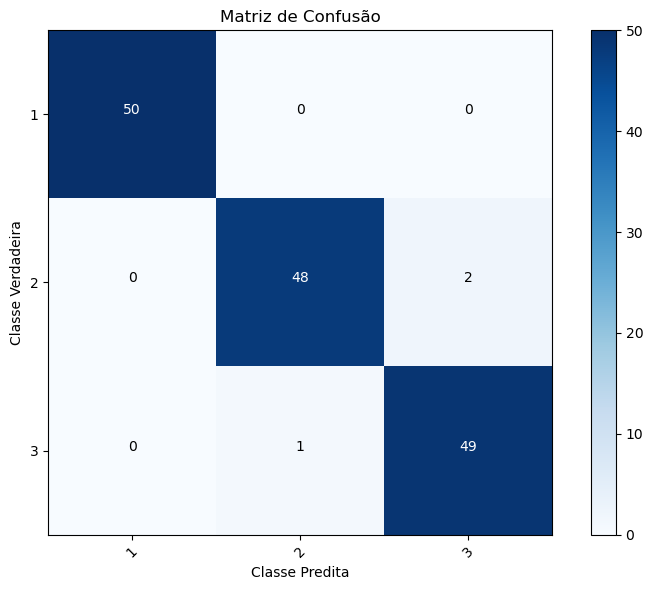

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y, y_pred)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))
plt.xticks(tick_marks, np.unique(y), rotation=45)
plt.yticks(tick_marks, np.unique(y))
plt.ylabel('Classe Verdadeira')
plt.xlabel('Classe Predita')

# Adicionando os valores nos quadrados
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], 'd'),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.show()